In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [24]:
df = pd.read_csv('../data/spray.csv')

In [25]:
df.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [26]:
df.columns = [x.lower().replace(' ', '_') for x in df.columns]
df.head()

,date,time,latitude,longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
date         14835 non-null object
time         14251 non-null object
latitude     14835 non-null float64
longitude    14835 non-null float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [28]:
df['date'] = pd.to_datetime(df['date'])

In [29]:
#df['Time'] = pd.to_datetime(df['Time'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
date         14835 non-null datetime64[ns]
time         14251 non-null object
latitude     14835 non-null float64
longitude    14835 non-null float64
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 463.7+ KB


In [31]:
df.isnull().sum()

date           0
time         584
latitude       0
longitude      0
dtype: int64

In [32]:
df.isnull().sum() / len(df)

date         0.000000
time         0.039366
latitude     0.000000
longitude    0.000000
dtype: float64

In [33]:
df = df[~df.time.isnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14251 entries, 0 to 14834
Data columns (total 4 columns):
date         14251 non-null datetime64[ns]
time         14251 non-null object
latitude     14251 non-null float64
longitude    14251 non-null float64
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 556.7+ KB


In [34]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13710 entries, 0 to 14834
Data columns (total 4 columns):
date         13710 non-null datetime64[ns]
time         13710 non-null object
latitude     13710 non-null float64
longitude    13710 non-null float64
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 535.5+ KB


In [35]:
df.set_index('date', inplace=True)
df.head()

,time,latitude,longitude
date,,,
2011-08-29,6:56:58 PM,42.391623,-88.089163
2011-08-29,6:57:08 PM,42.391348,-88.089163
2011-08-29,6:57:18 PM,42.391022,-88.089157
2011-08-29,6:57:28 PM,42.390637,-88.089158
2011-08-29,6:57:38 PM,42.390410,-88.088858


/Users/nelson/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/nelson/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


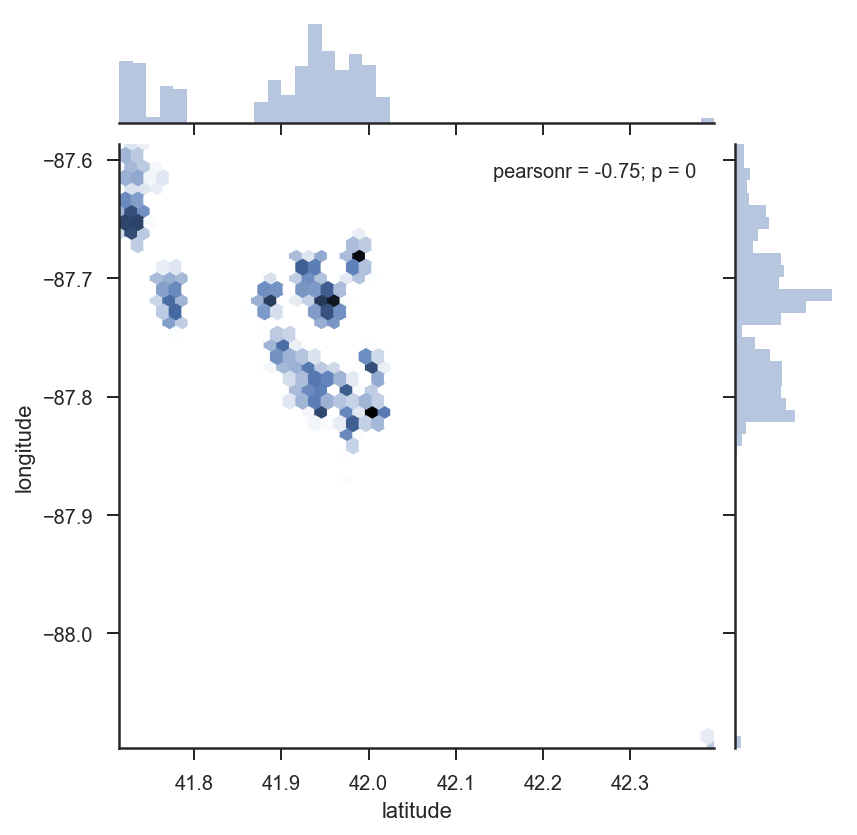

In [47]:
sns.set(style="ticks");
sns.jointplot(df['latitude'], df['longitude'], kind='hex');
plt.tight_layout;
plt.savefig('../plots/lat_log_joinplot')

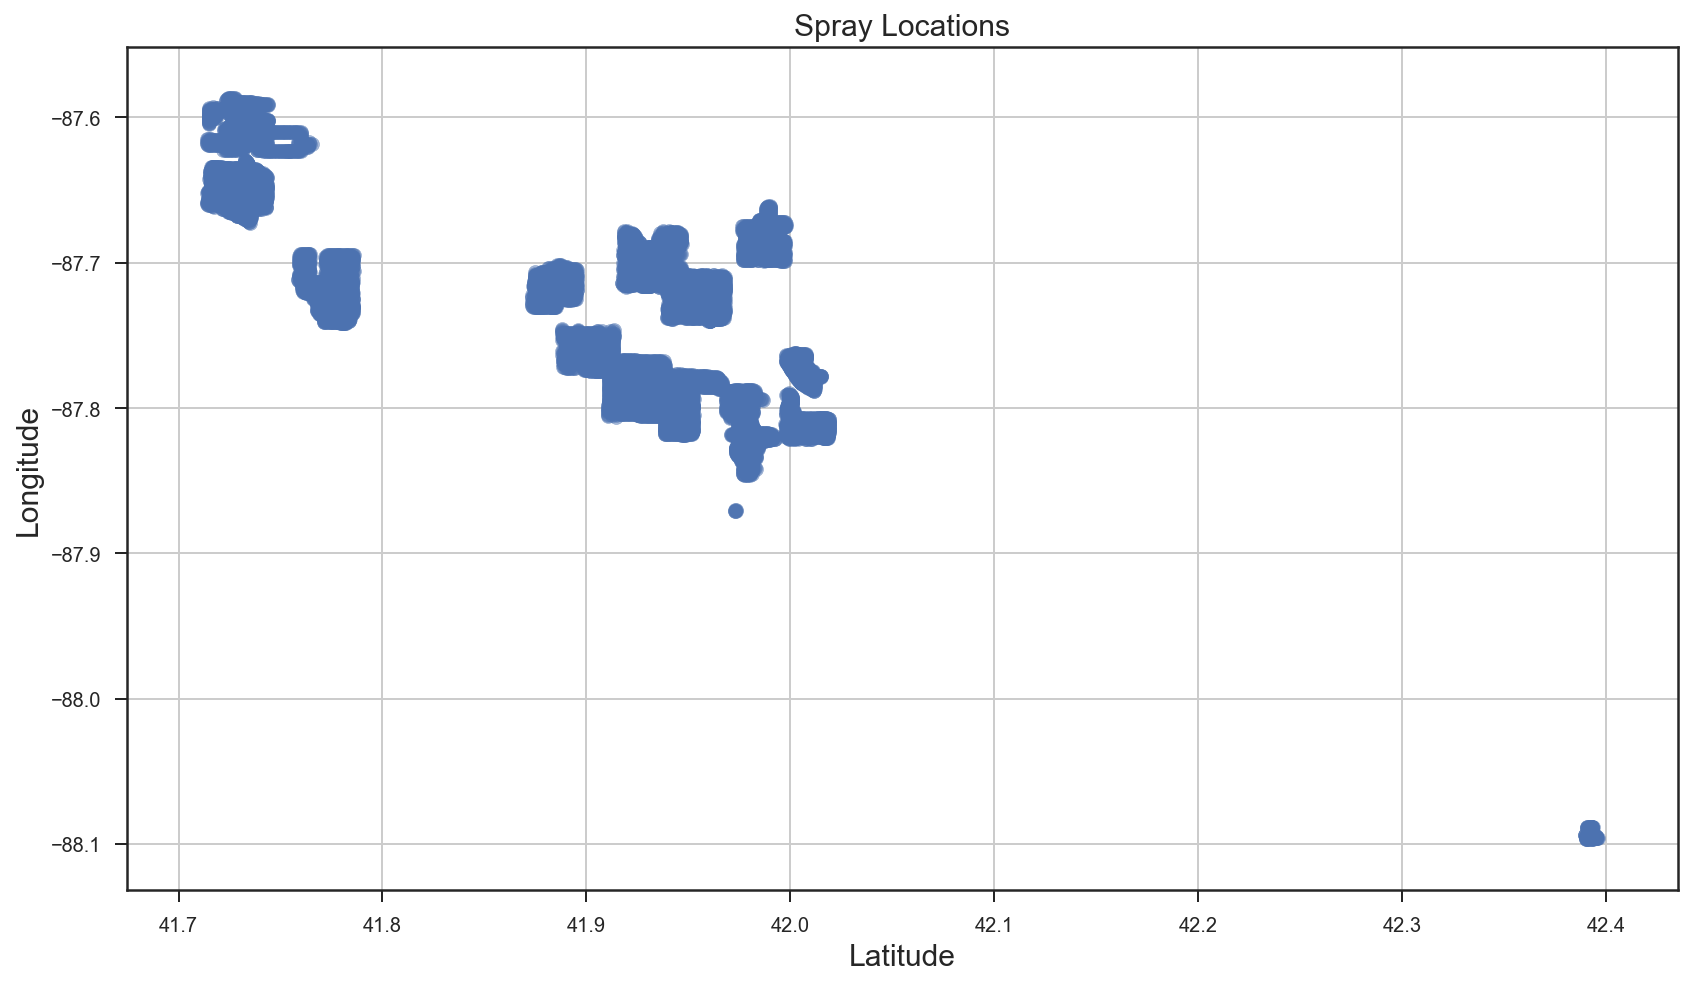

<Figure size 432x288 with 0 Axes>

In [48]:
fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(df['latitude'], df['longitude'], alpha=0.5)

ax.set_xlabel('Latitude', fontsize=15)
ax.set_ylabel('Longitude', fontsize=15)
ax.set_title('Spray Locations', fontsize=15)

ax.grid(True)
fig.tight_layout()

plt.show()
plt.savefig('../plots/lat_long_scatter')

In [38]:
df_2011 = df['2011']
df_2013 = df['2013']

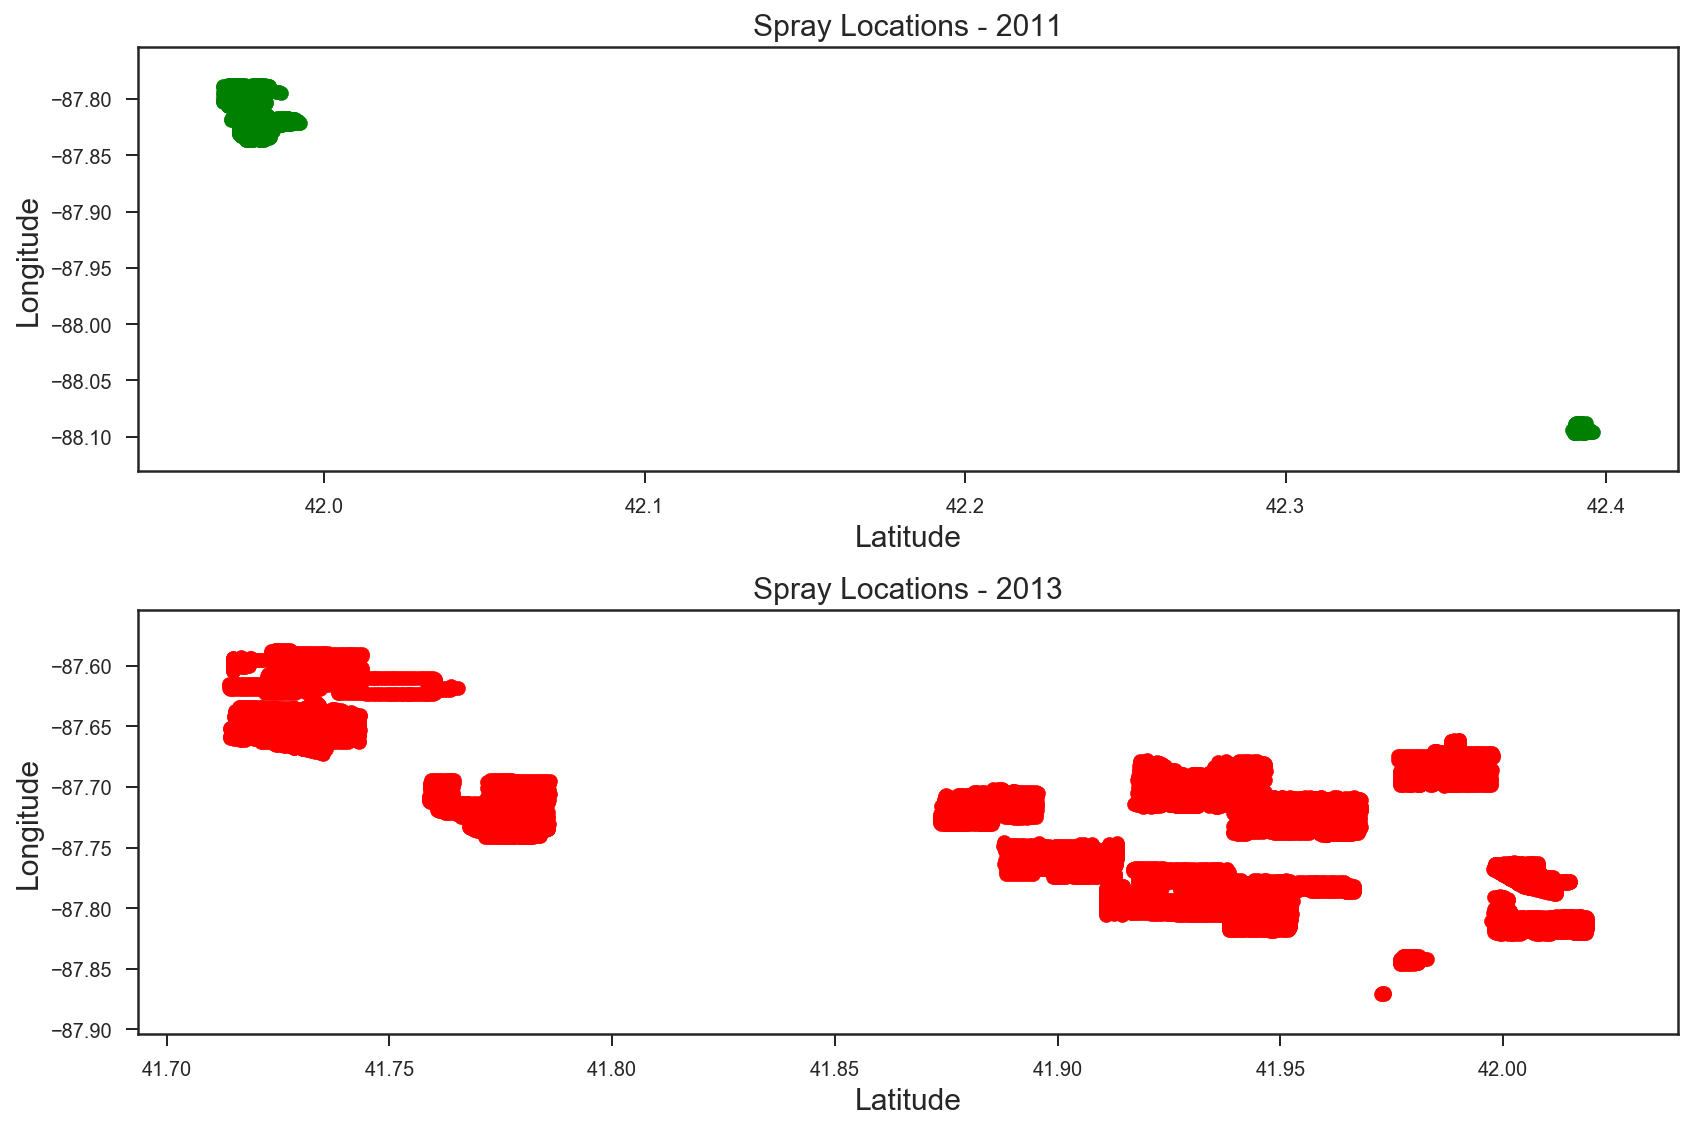

<Figure size 432x288 with 0 Axes>

In [49]:
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(12,8))
axes[0].scatter(df_2011['latitude'], df_2011['longitude'], color='g')
axes[1].scatter(df_2013['latitude'], df_2013['longitude'], color='r')

axes[0].set_xlabel('Latitude', fontsize=15)
axes[0].set_ylabel('Longitude', fontsize=15)
axes[0].set_title('Spray Locations - 2011', fontsize=15)

axes[1].set_xlabel('Latitude', fontsize=15)
axes[1].set_ylabel('Longitude', fontsize=15)
axes[1].set_title('Spray Locations - 2013', fontsize=15)

ax.grid(True)
fig.tight_layout()

plt.show()
plt.savefig('../plots/spray_by_year')

In [40]:
df_times_sprayed = df.index.value_counts().sort_index().to_frame()
df_times_sprayed.T.values[0]

array([  95,  989, 2202, 1607, 1195, 2668,  141, 1587, 2302,  924])

In [41]:
df_times_sprayed_11 = df_2011.index.value_counts().sort_index().to_frame()
df_times_sprayed_11.T.values[0]

array([ 95, 989])

In [42]:
df_times_sprayed_13 = df_2013.index.value_counts().sort_index().to_frame()
df_times_sprayed_13.T.values[0]

array([2202, 1607, 1195, 2668,  141, 1587, 2302,  924])

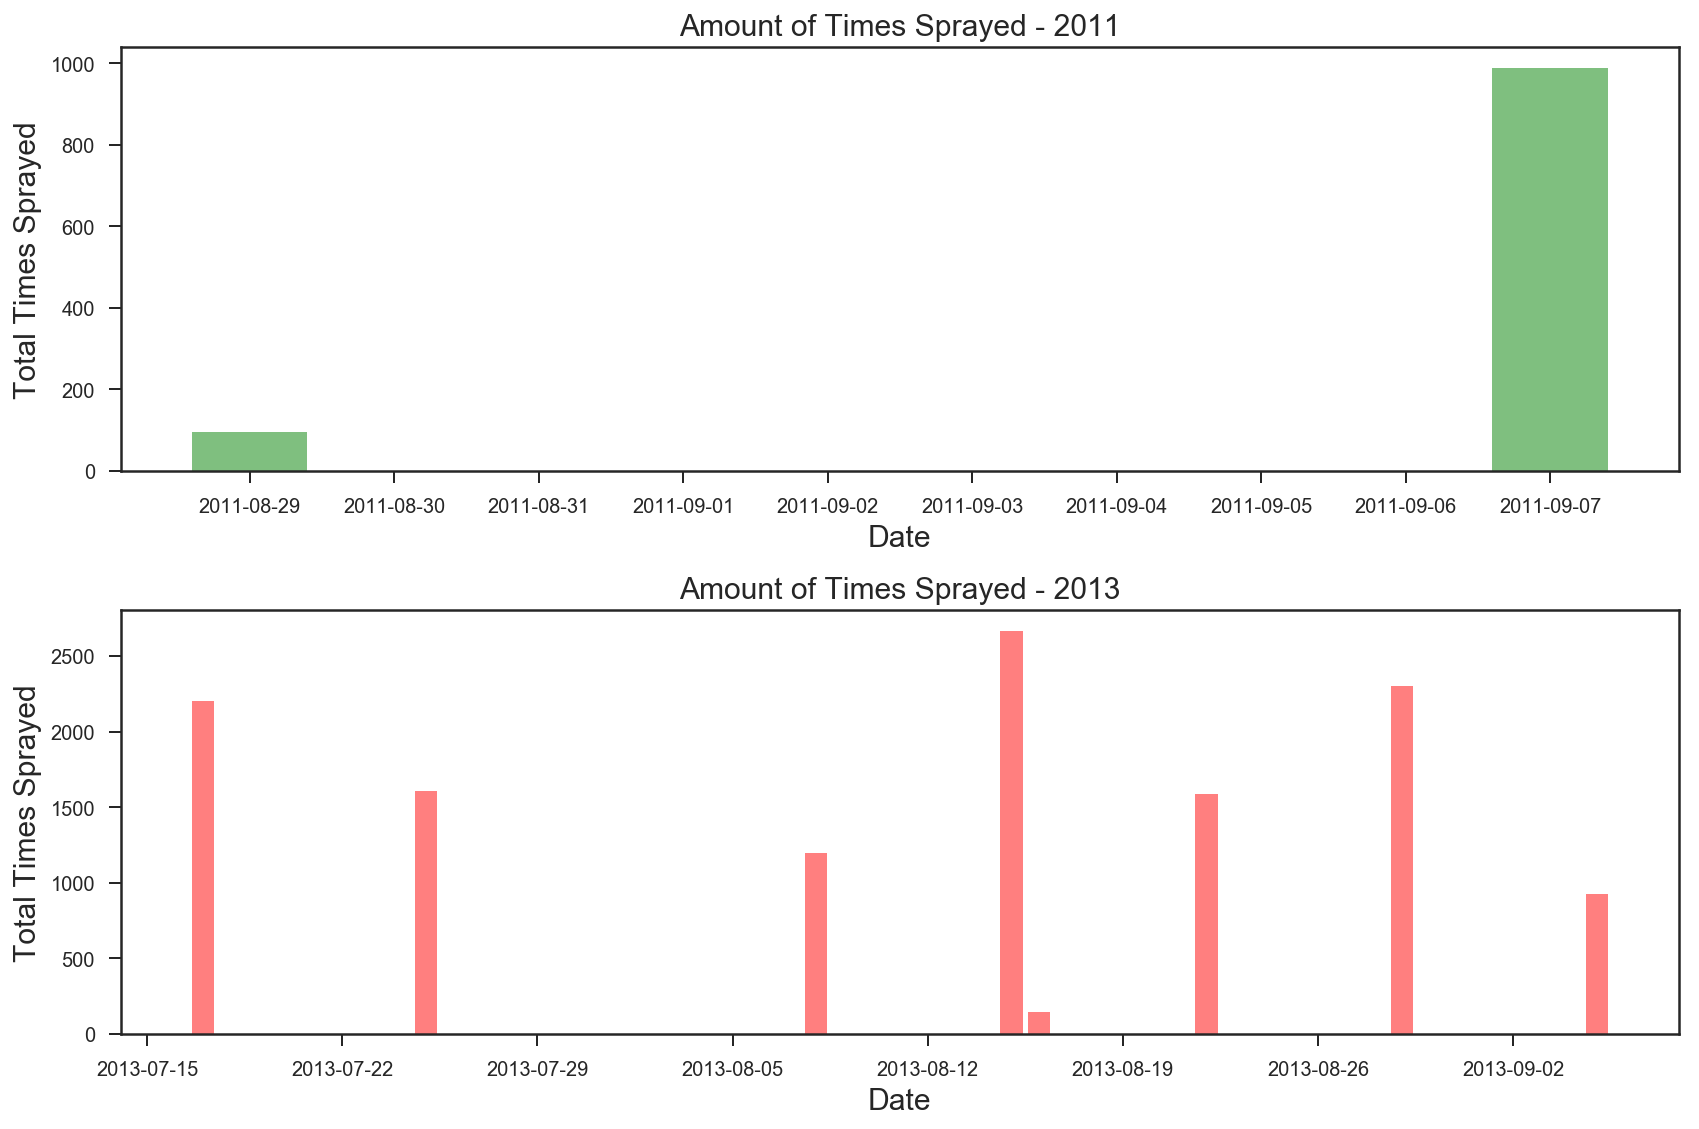

<Figure size 432x288 with 0 Axes>

In [50]:
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(12,8))

axes[0].bar(df_times_sprayed_11.index, df_times_sprayed_11.T.values[0], color='g', alpha=.5)
axes[1].bar(df_times_sprayed_13.index, df_times_sprayed_13.T.values[0], color='r', alpha=.5)

axes[0].set_xlabel('Date', fontsize=15)
axes[0].set_ylabel('Total Times Sprayed', fontsize=15)
axes[0].set_title('Amount of Times Sprayed - 2011', fontsize=15)

axes[1].set_xlabel('Date', fontsize=15)
axes[1].set_ylabel('Total Times Sprayed', fontsize=15)
axes[1].set_title('Amount of Times Sprayed - 2013', fontsize=15)

ax.grid(True)
fig.tight_layout()

plt.show()
plt.savefig('../plots/amount_sprayed_by_year')

In [44]:
df_2011.index.value_counts()

2011-09-07    989
2011-08-29     95
Name: date, dtype: int64

In [45]:
df_2013.index.value_counts().sort_index()

2013-07-17    2202
2013-07-25    1607
2013-08-08    1195
2013-08-15    2668
2013-08-16     141
2013-08-22    1587
2013-08-29    2302
2013-09-05     924
Name: date, dtype: int64

### Save Files

In [46]:
df.to_csv('../data/cleaned_spray.csv')